In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.stats import spearmanr, pearsonr
import numpy as np
import seaborn as sns
df = pd.read_excel("player_salaries_2014_2018_test.xlsx", index_col = 0)

In [53]:
df.shape

(990, 56)

In [54]:
import sklearn

In [55]:
X = df.drop(['Salary in $', 'Player', 'Full Team Name'], axis = 1)
Y = np.log(df['Salary in $'])


Text(0.5, 1.0, 'Salary Distribution')

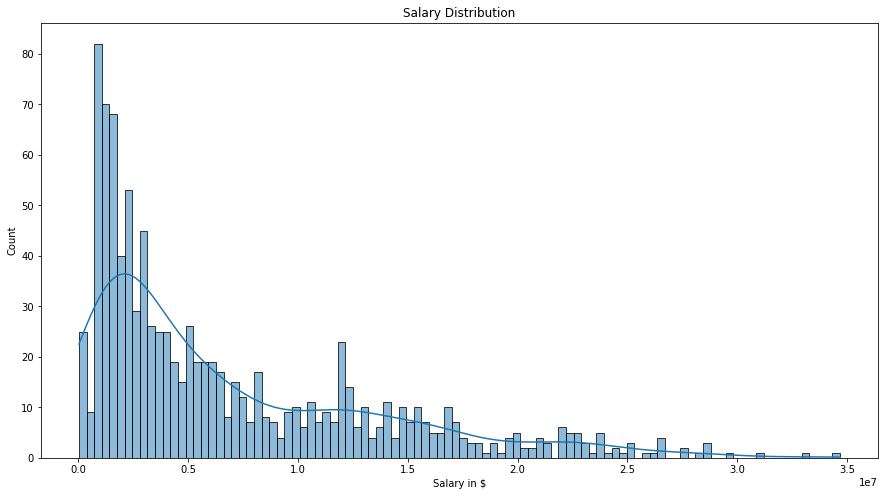

In [56]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data = df, x ='Salary in $',bins = 100, kde = True)
ax.set_title('Salary Distribution')

Text(0.5, 1.0, 'Assists Percentage Distribution')

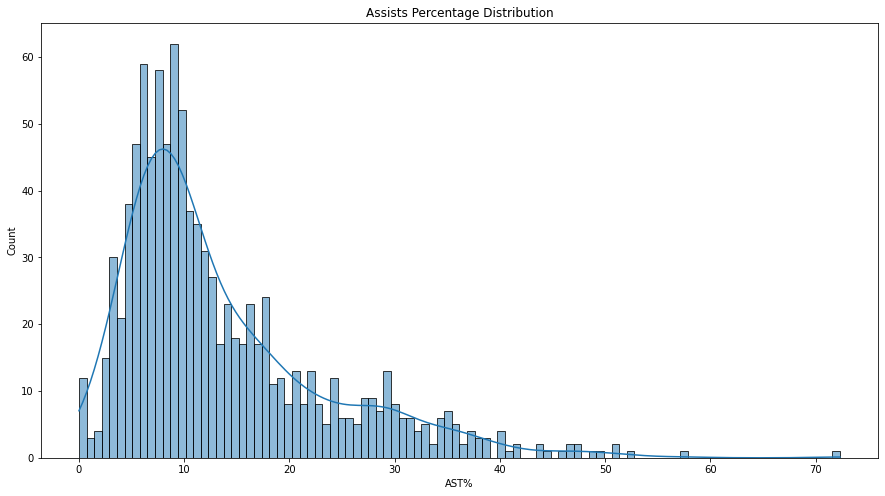

In [57]:
plt.figure(figsize=(15,8))
ax = sns.histplot(X['AST%'], bins = 100,
            kde = True)
ax.set_title('Assists Percentage Distribution')

Text(0.5, 1.0, 'Free Throws Distribution')

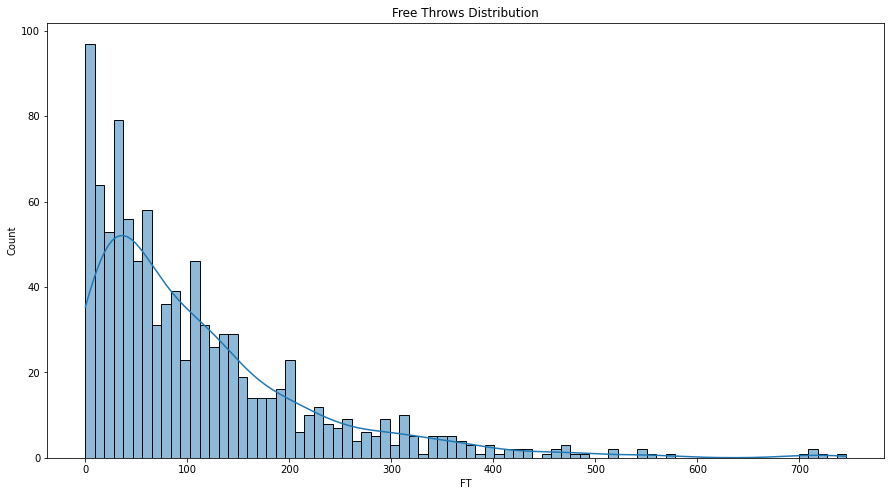

In [58]:
plt.figure(figsize=(15,8))
ax = sns.histplot(X['FT'], bins = 80
            ,kde = True)
ax.set_title('Free Throws Distribution')

In [20]:
#After working with teh data and making models- I want to try to see if I can get better results if 
#I log transform all the features and not just hte outcome variable


In [59]:
X['AST%'] = np.log(X['AST%']+1)
X['AST'] = np.log(X['AST']+1)
X['FT'] = np.log(X['FT']+1)
X['FTA'] = np.log(X['FTA']+1)
X['BLK%'] = np.log(X['BLK%']+1)
X['BLK'] = np.log(X['BLK']+1)
X['3PA'] = np.log(X['3PA']+1)
X['3P'] = np.log(X['3P']+1)
X = pd.get_dummies(X, columns = ['Pos', "Tm"])
X = X.fillna(0)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.33,random_state = 5 )


In [61]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(663, 85)
(327, 85)
(663,)
(327,)


In [62]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
X_train = StandardScaler.fit_transform(X_train)
X_test = StandardScaler.transform(X_test)

In [63]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=0.95)
#X_pca= sklearn_pca.fit_transform(X_train)
X_train = sklearn_pca.fit_transform(X_train)
#Y_pca = sklearn_pca.transform(Y)
X_test = sklearn_pca.transform(X_test)

In [64]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
#LinReg.fit(X_train,Y_train)
LinReg.fit(X_train,Y_train)
#Y_pred = LinReg.predict(X_test)
Y_pred = LinReg.predict(X_test)

In [65]:
print(X_train.shape)

(663, 42)


# BASELINE

In [66]:
baseline_fit = np.mean(Y_train)

# compute root mean square error (RMSE) for each model
print(
    'RMSE baseline model on Training Data:', np.sqrt(np.mean((Y_train - baseline_fit)**2))
)

# compute mean square error (MSE) for each model
print(
    'RMSE baseline model on Testing Data:', np.sqrt(np.mean((Y_test - baseline_fit)**2))
)
print(
    'MAE baseline model on Testing Data:', np.mean(abs(Y_test-baseline_fit))
)
#https://datagy.io/mape-python/
def mape_2(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape
print(
    'MAPE baseline model on Testing Data:', mape_2(Y_test, baseline_fit)
)
print(
    'Spearman baseline model on Testing Data:', round(spearmanr(Y_test, ypred)[0],3)
)


RMSE baseline model on Training Data: 1.1238109716675213
RMSE baseline model on Testing Data: 1.2484509244770698
MAE baseline model on Testing Data: 0.9957579031146466
MAPE baseline model on Testing Data: 0.06791435040611297
Spearman baseline model on Testing Data: 0.752


In [241]:
import sklearn
import numpy as np
#print("R^2", LinReg.score(Y_pred , Y_test))
#print("R^2", LinReg.score(X_pca , Y_test))
print(LinReg.score(X_test, Y_test))
# mean absolute error which is the average of all predicted error values ,where all predicted error values are forced to be positive 
print("Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(Y_test, Y_pred))
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error: ", sklearn.metrics.mean_absolute_percentage_error(Y_test, Y_pred))
#MAPE - find
#root mean squared error is the root of the average of the squared predicted error values.
print("RMSE:", np.sqrt(mse))
print(round(spearmanr(Y_test, Y_pred)[0],3))
#round(spearmanr(Y_test, ypred)[0],3)

0.4733631736236734
Mean Absolute Error:  0.6501309459765586
Mean Squared Error: 0.8206945084349861
Mean Absolute Percentage Error:  0.04500936699805403
RMSE: 0.9059219107820421
0.751


# SGDRegressor

In [242]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()
sgdr.fit(X_train, Y_train)
ypred = sgdr.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(Y_test, ypred))
mse = sklearn.metrics.mean_squared_error(Y_test, ypred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error: ", sklearn.metrics.mean_absolute_percentage_error(Y_test, ypred))
#MAPE - find
#root mean squared error is the root of the average of the squared predicted error values.
print("RMSE:", np.sqrt(mse))
print(round(spearmanr(Y_test, ypred)[0],3))

MSE:  0.8046560518312267
RMSE:  0.8970262269472541
Mean Absolute Error:  0.646801857429746
Mean Squared Error: 0.8046560518312267
Mean Absolute Percentage Error:  0.0446117931934697
RMSE: 0.8970262269472541
0.755


# GradientBoosting Regressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=0)

In [29]:
ypred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(Y_test, ypred))
mse = sklearn.metrics.mean_squared_error(Y_test, ypred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error: ", sklearn.metrics.mean_absolute_percentage_error(Y_test, ypred))
#MAPE - find
#root mean squared error is the root of the average of the squared predicted error values.
print("RMSE:", np.sqrt(mse))
round(spearmanr(Y_test, ypred)[0],3)

MSE:  0.7953585322225192
RMSE:  0.8918287572300633
Mean Absolute Error:  0.6306250312000606
Mean Squared Error: 0.7953585322225192
Mean Absolute Percentage Error:  0.043419907187044214
RMSE: 0.8918287572300633


0.752

# RandomForestRegressor

In [245]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train, Y_train)



RandomForestRegressor(max_depth=5, random_state=0)

In [246]:
ypred = regr.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(Y_test, ypred))
mse = sklearn.metrics.mean_squared_error(Y_test, ypred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error: ", sklearn.metrics.mean_absolute_percentage_error(Y_test, ypred))
#MAPE - find
#root mean squared error is the root of the average of the squared predicted error values.
print("RMSE:", np.sqrt(mse))
round(spearmanr(Y_test, ypred)[0],3)

#print(regr.score(ypred, np.array(Y_test).reshape(1,-1)))

MSE:  0.7669780417905963
RMSE:  0.8757728254465288
Mean Absolute Error:  0.6366103911521374
Mean Squared Error: 0.7669780417905963
Mean Absolute Percentage Error:  0.043911913628891526
RMSE: 0.8757728254465288


0.759

In [250]:
#Random Forest has lowest RMSE
from sklearn.model_selection import GridSearchCV
param_grid = { 
  'n_estimators': [100,200,300,500,600], 
  'criterion': ['squared_error'],#, 'absolute_error', 'poisson'],
    'max_features': ['sqrt', 'log2', None],
   'oob_score':[True, False],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf':[1,2,3]
    #'max_iter':[1000,2000,3000,5000]
}
grid = GridSearchCV(RandomForestRegressor(), param_grid, refit=True, verbose=3)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.354 total time=   0.3s
[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.367 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.462 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.345 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.355 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, 

[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.374 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.367 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.423 total time=   0.3s
[CV 4/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.375 total time=   0.3s
[CV 5/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.358 total time=   0.3s
[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.338 total time=   0.2s
[CV 2/5] END cr

[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.372 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.375 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.453 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.360 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.356 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.368 total time=   0.2s
[CV 2/5] END cr

[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.364 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.442 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.345 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.366 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.360 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.377 total time=   0.2s
[CV 3/5] END c

[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.363 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.422 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.334 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.339 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.379 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.394 total time=   0.2s
[CV 3/5] END c

[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.373 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.438 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.353 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.349 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.352 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.372 total time=   0.2s
[CV 3/5] END c

[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.378 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.459 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.348 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.348 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.333 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.376 total time=   0.2s
[CV 3/5] END c

[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.367 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.433 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.323 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.354 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.357 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.371 total time=   0.2s
[CV 3/5] END c

[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.358 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.435 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.339 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.327 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.353 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.359 total time=   0.2s
[CV 3/5] END c

[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.365 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.409 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.354 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.345 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.369 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.384 total time=   0.2s
[CV 3/5] END c

[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.344 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.440 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.368 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.354 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.347 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.355 total time=   0.2s
[CV 3/5] END c

[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.362 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.446 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.311 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.335 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.358 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.362 total time=   0.2s
[CV 3/5] END c

[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.368 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.470 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.345 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.355 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.358 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.336 total time=   0.2s
[CV 3/5] END c

[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.345 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.473 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.323 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.368 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.355 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.334 total time=   0.3s
[CV 3/5] END c

[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.355 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.413 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.326 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.328 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.342 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.349 total time=   0.2s
[CV 3/5] END c

[CV 3/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.426 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.316 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.339 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.369 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.353 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.438 total time=   0.2s
[CV 4/5] END 

[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.323 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.297 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.352 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.349 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.439 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.324 total time=   0.2s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.318 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.363 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.340 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.357 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.441 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.330 total time=   0.2s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.341 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.329 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.352 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.355 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.405 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.325 total time=   0.2s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.349 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.308 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.331 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.361 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.443 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.315 total time=   0.1s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.358 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.323 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.324 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.329 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.439 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.339 total time=   0.2s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.333 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.319 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.349 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.345 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.415 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.330 total time=   0.1s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.298 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.332 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.322 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.347 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.419 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.324 total time=   0.1s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.338 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.331 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.343 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.341 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.414 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.319 total time=   0.1s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.444 total time=   0.7s
[CV 5/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.336 total time=   0.7s
[CV 1/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.374 total time=   0.6s
[CV 2/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.447 total time=   0.6s
[CV 3/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.512 total time=   0.6s
[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.421 total time=   0.6s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.423 total time=   0.6s
[CV 5/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.338 total time=   0.6s
[CV 1/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.363 total time=   0.6s
[CV 2/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.433 total time=   0.7s
[CV 3/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.524 total time=   0.7s
[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.410 total time=   0.6s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.424 total time=   0.7s
[CV 5/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.356 total time=   0.7s
[CV 1/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.371 total time=   0.6s
[CV 2/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.457 total time=   0.6s
[CV 3/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.527 total time=   0.6s
[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.426 total time=   0.7s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.430 total time=   0.7s
[CV 5/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.345 total time=   0.7s
[CV 1/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.358 total time=   0.7s
[CV 2/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.455 total time=   0.8s
[CV 3/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.520 total time=   0.7s
[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.423 total time=   0.7s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.419 total time=   0.6s
[CV 5/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.339 total time=   0.7s
[CV 1/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.369 total time=   0.6s
[CV 2/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.479 total time=   0.6s
[CV 3/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.539 total time=   0.6s
[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.423 total time=   0.6s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.436 total time=   0.7s
[CV 5/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.345 total time=   0.7s
[CV 1/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.380 total time=   0.7s
[CV 2/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.462 total time=   0.7s
[CV 3/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.520 total time=   0.7s
[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.416 total time=   0.7s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.427 total time=   0.6s
[CV 5/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.308 total time=   0.6s
[CV 1/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.366 total time=   0.6s
[CV 2/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.451 total time=   0.6s
[CV 3/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.518 total time=   0.6s
[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.439 total time=   0.6s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.414 total time=   0.7s
[CV 5/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.324 total time=   0.8s
[CV 1/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.391 total time=   0.6s
[CV 2/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.437 total time=   0.6s
[CV 3/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.508 total time=   0.6s
[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.432 total time=   0.6s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.421 total time=   0.6s
[CV 5/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.330 total time=   0.6s
[CV 1/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.371 total time=   0.5s
[CV 2/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.457 total time=   0.6s
[CV 3/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.521 total time=   0.7s
[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.410 total time=   0.6s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.422 total time=   0.6s
[CV 5/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=True;, score=0.301 total time=   0.6s
[CV 1/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.367 total time=   0.5s
[CV 2/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.447 total time=   0.5s
[CV 3/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.522 total time=   0.5s
[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100, oob_score=False;, score=0.401 total time=   0.5s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.429 total time=   0.5s
[CV 5/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=True;, score=0.331 total time=   0.5s
[CV 1/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.365 total time=   0.5s
[CV 2/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.476 total time=   0.5s
[CV 3/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.515 total time=   0.5s
[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=100, oob_score=False;, score=0.432 total time=   0.5s
[CV 5/5] END

[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.414 total time=   0.6s
[CV 5/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=True;, score=0.307 total time=   0.6s
[CV 1/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.382 total time=   0.6s
[CV 2/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.467 total time=   0.6s
[CV 3/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.497 total time=   0.6s
[CV 4/5] END criterion=squared_error, max_features=None, min_samples_leaf=3, min_samples_split=8, n_estimators=100, oob_score=False;, score=0.401 total time=   0.7s
[CV 5/5] END

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300, 500, 600],
                         'oob_score': [True, False]},
             verbose=3)

In [256]:
grid.best_params_

{'criterion': 'squared_error',
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200,
 'oob_score': False}

In [252]:
grid_pred = grid.predict(X_test)
mse = mean_squared_error(Y_test, grid_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("Mean Absolute Error: ", sklearn.metrics.mean_absolute_error(Y_test, grid_pred))
print("Mean Absolute Percentage Error: ", sklearn.metrics.mean_absolute_percentage_error(Y_test, grid_pred))

round(spearmanr(Y_test, grid_pred)[0],3)

MSE:  0.7592975538901848
RMSE:  0.8713768150979143
Mean Absolute Error:  0.6215443767033134
Mean Absolute Percentage Error:  0.04293051917770282


0.764

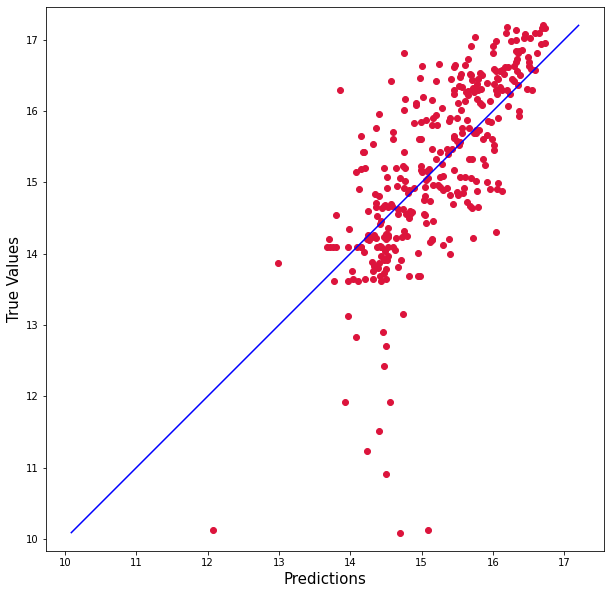

In [253]:
plt.figure(figsize=(10,10))
plt.scatter(grid_pred, Y_test, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(grid_pred), max(Y_test))
p2 = min(min(grid_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()

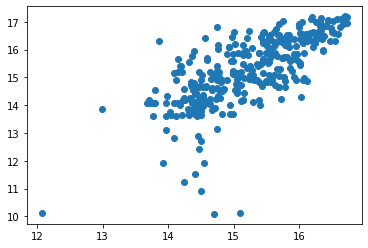

In [254]:
plt.scatter(grid_pred, Y_test)

In [75]:
n_pcs = sklearn_pca.components_.shape[0]
most_important = [np.abs(sklearn_pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = list(X.columns)
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

In [81]:
dic
df = pd.DataFrame(dic.items())
df.head(10)
#Fiekd goals
#Total Rebounds
#Effective Field Goal Percentage
#Year
#position: PG
#Defensive Box Plus/Minus
#Turnovers
#AGE

,0,1
0,PC0,FG
1,PC1,TRB%
2,PC2,eFG%
3,PC3,Year
4,PC4,Pos_PG
5,PC5,DBPM
6,PC6,TOV%
7,PC7,Age
8,PC8,Pos_SG
9,PC9,Pos_SF


# LSTM Regression 

In [31]:
X_train.shape

(663, 42)

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, GRU

In [33]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(663, 42)
(327, 42)
(663,)
(327,)


In [34]:
Y_train = np.array(Y_train).reshape(663,1)
Y_test= np.array(Y_test).reshape(327,1)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(663, 42)
(327, 42)
(663, 1)
(327, 1)


In [36]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 30
X_test, y_test = create_dataset(X_test, Y_test,   
                                30)
X_train, y_train = create_dataset(X_train, Y_train, 
                                  30)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_train.shape)

X_train.shape:  (297, 30, 42)
y_train.shape:  (633, 1)
X_test.shape:  (297, 30, 42)
y_test.shape:  (633, 1)


In [37]:
# Create BiLSTM model
#https://towardsdatascience.com/predictive-analysis-rnn-lstm-and-gru-to-predict-water-consumption-e6bb3c2b4b02

def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(m(units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(loss='mse', optimizer='adam')
    return model


model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

In [38]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, Y_train, epochs = 100,  
                        validation_split = 0.2, batch_size = 32, 
                        shuffle = False, callbacks = [early_stop])
    return history
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)

Epoch 1/100
16/16 [==============================] - 4s 60ms/step - loss: 220.2798 - val_loss: 181.8602
Epoch 2/100
16/16 [==============================] - 0s 22ms/step - loss: 117.4814 - val_loss: 63.6182
Epoch 3/100
16/16 [==============================] - 0s 21ms/step - loss: 40.4253 - val_loss: 20.0294
Epoch 4/100
16/16 [==============================] - 0s 21ms/step - loss: 14.3776 - val_loss: 8.4925
Epoch 5/100
16/16 [==============================] - 0s 21ms/step - loss: 7.2023 - val_loss: 4.2155
Epoch 6/100
16/16 [==============================] - 0s 21ms/step - loss: 4.3070 - val_loss: 2.4904
Epoch 7/100
16/16 [==============================] - 0s 21ms/step - loss: 3.3364 - val_loss: 1.7703
Epoch 8/100
16/16 [==============================] - 0s 21ms/step - loss: 2.5930 - val_loss: 1.5040
Epoch 9/100
16/16 [==============================] - 0s 21ms/step - loss: 2.3589 - val_loss: 1.4049
Epoch 10/100
16/16 [==============================] - 0s 21ms/step - loss: 2.6133 - val_lo

In [39]:
def prediction(model):
    prediction = model.predict(X_test)
    #prediction = scaler_y.inverse_transform(prediction)
    return prediction

prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)

10/10 [==============================] - 1s 5ms/step


In [40]:
prediction_lstm
#getting very close in value

array([[15.096606 ],
       [15.0963335],
       [15.102396 ],
       [15.09869  ],
       [15.104912 ],
       [15.0941925],
       [15.101884 ],
       [15.101913 ],
       [15.099892 ],
       [15.1029825],
       [15.103304 ],
       [15.099375 ],
       [15.099786 ],
       [15.104012 ],
       [15.088904 ],
       [15.102138 ],
       [15.101312 ],
       [15.103471 ],
       [15.104513 ],
       [15.102185 ],
       [15.101779 ],
       [15.099874 ],
       [15.102986 ],
       [15.101511 ],
       [15.104853 ],
       [15.0979595],
       [15.100686 ],
       [15.101837 ],
       [15.101218 ],
       [15.103813 ],
       [15.104586 ],
       [15.105119 ],
       [15.100383 ],
       [15.104133 ],
       [15.104506 ],
       [15.102751 ],
       [15.104192 ],
       [15.100916 ],
       [15.100686 ],
       [15.104162 ],
       [15.103076 ],
       [15.10358  ],
       [15.091905 ],
       [15.098514 ],
       [15.099704 ],
       [15.101051 ],
       [15.102163 ],
       [15.09

In [41]:
prediction_gru

array([[15.131037 ],
       [15.131707 ],
       [15.129832 ],
       [15.129781 ],
       [15.129743 ],
       [15.131879 ],
       [15.133758 ],
       [15.134595 ],
       [15.134492 ],
       [15.134341 ],
       [15.1342125],
       [15.130901 ],
       [15.131131 ],
       [15.131295 ],
       [15.13083  ],
       [15.130237 ],
       [15.130864 ],
       [15.129828 ],
       [15.127408 ],
       [15.124982 ],
       [15.124639 ],
       [15.126199 ],
       [15.129361 ],
       [15.129468 ],
       [15.1271925],
       [15.130036 ],
       [15.132724 ],
       [15.134745 ],
       [15.135505 ],
       [15.134587 ],
       [15.133529 ],
       [15.134065 ],
       [15.134608 ],
       [15.134444 ],
       [15.134587 ],
       [15.134472 ],
       [15.134997 ],
       [15.134804 ],
       [15.1338415],
       [15.133488 ],
       [15.132741 ],
       [15.133658 ],
       [15.129247 ],
       [15.130413 ],
       [15.129931 ],
       [15.129598 ],
       [15.129015 ],
       [15.12

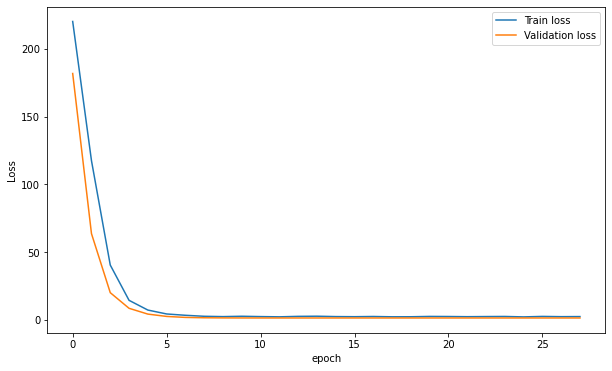

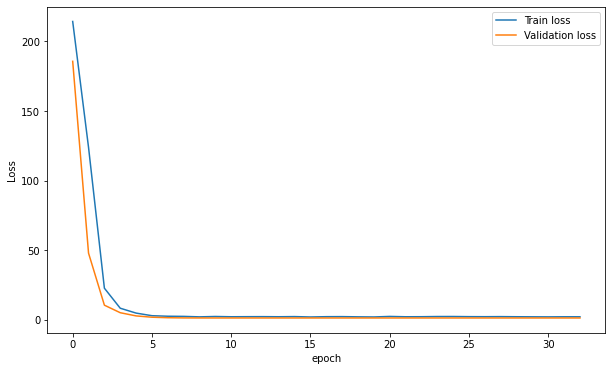

In [42]:
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')

plot_loss (history_lstm)
plot_loss (history_gru)

In [50]:
def mape_2(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    mape=mape_2(actual, predictions)
    print(model_name + ':')
    print('Mean Absolute Error: {:.3f}'.format(mae))
    print('Root Mean Square Error: {:.3f}'.format(rmse))
    print('Mean Square Error: {:.3f}'.format(mse))
    print('Mean Absolute Error: {:.3f}'.format(mape))
    print('Spearman',round(spearmanr(actual, predictions)[0],3))
    
    

evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')

LSTM:
Mean Absolute Error: 0.978
Root Mean Square Error: 1.227
Mean Square Error: 1.506
Mean Absolute Error: 0.066
Spearman 0.05
GRU:
Mean Absolute Error: 0.977
Root Mean Square Error: 1.225
Mean Square Error: 1.500
Mean Absolute Error: 0.066
Spearman 0.061


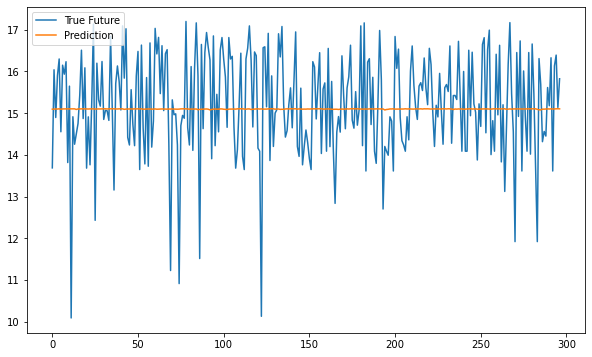

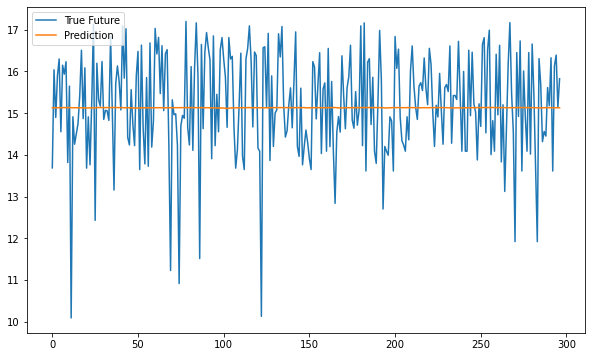

In [46]:
# Plot true future vs prediction
def plot_future(prediction, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='True Future')     
    plt.plot(np.arange(range_future),np.array(prediction),
            label='Prediction')
    plt.legend(loc='upper left')
 
plot_future(prediction_lstm, y_test)
plot_future(prediction_gru, y_test)

In [48]:
print(sklearn.__version__)
print(tf.__version__)

1.1.2
2.10.0
